In [1]:
import os 

import numpy as np
import matplotlib.pyplot as plt

from tsai.all import *
my_setup()

os              : Linux-6.2.0-39-generic-x86_64-with-glibc2.35
python          : 3.10.12
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.1.2+cu121
device          : 1 gpu (['NVIDIA GeForce RTX 3060 Laptop GPU'])
cpu cores       : 8
threads per cpu : 2
RAM             : 13.49 GB
GPU memory      : [6.0] GB


In [2]:
# Load data from each folder in /data/toPreProc/

data_dict = {}
label_dict = {}

for folder in os.listdir('data/toPreProc/'):
    print("Folder name: ", folder)
    data_dict[folder] = np.load(f'data/toPreProc/{folder}/{folder}PreprocessedData.npy')
    labels = np.load(f'data/toPreProc/{folder}/{folder}Labels.npy', allow_pickle=True)
    label_dict[folder] = labels[:-1, 2]
    print("Data shape: ", data_dict[folder].shape)
    print("Label shape: ", label_dict[folder].shape)

Folder name:  2023-12-14_008
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-14_005
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-14_007
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-17_008
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-17_004
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-14_006
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-14_004
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-14_009
Data shape:  (40, 100, 68)
Label shape:  (40,)
Folder name:  2023-12-17_006
Data shape:  (40, 100, 68)
Label shape:  (40,)


In [3]:
print((label_dict['2023-12-14_004']))
print(type(label_dict['2023-12-14_004'][0]))

to_bin = False

to_fourway = False

for key, val in label_dict.items():
    int_list = [eval(i) for i in val]

    if(to_bin):
        bin_list = []

        for elem in int_list:
            if(elem//4 > 0):
                bin_list.append(0)
            else:
                bin_list.append(1)
        label_dict[key] = bin_list                                  
        print(bin_list)
    elif(to_fourway):
        fourway_list = []

        for elem in int_list:
            if(elem > 6):
                fourway_list.append(3)
            elif(elem > 4):
                fourway_list.append(2)
            elif(elem > 2):
                fourway_list.append(1)
            else:   
                fourway_list.append(0)
        label_dict[key] = fourway_list
        print(fourway_list)
    else:
        label_dict[key] = [x - 1 for x in int_list]
        print(int_list)

['8.0' '6.0' '3.0' '4.0' '2.0' '1.0' '7.0' '5.0' '5.0' '4.0' '7.0' '6.0'
 '2.0' '8.0' '1.0' '3.0' '5.0' '6.0' '4.0' '2.0' '3.0' '8.0' '7.0' '1.0'
 '6.0' '5.0' '2.0' '4.0' '1.0' '3.0' '7.0' '8.0' '6.0' '5.0' '1.0' '4.0'
 '7.0' '2.0' '8.0' '3.0']
<class 'str'>
[5.0, 8.0, 6.0, 3.0, 1.0, 4.0, 7.0, 2.0, 8.0, 2.0, 3.0, 5.0, 7.0, 1.0, 6.0, 4.0, 4.0, 7.0, 1.0, 6.0, 3.0, 2.0, 8.0, 5.0, 5.0, 6.0, 1.0, 2.0, 3.0, 4.0, 7.0, 8.0, 1.0, 2.0, 8.0, 5.0, 3.0, 7.0, 6.0, 4.0]
[7.0, 6.0, 4.0, 2.0, 1.0, 8.0, 5.0, 3.0, 8.0, 3.0, 1.0, 6.0, 4.0, 2.0, 7.0, 5.0, 7.0, 2.0, 8.0, 4.0, 6.0, 3.0, 1.0, 5.0, 2.0, 3.0, 8.0, 1.0, 6.0, 4.0, 5.0, 7.0, 5.0, 4.0, 7.0, 3.0, 1.0, 2.0, 6.0, 8.0]
[7.0, 8.0, 1.0, 3.0, 5.0, 4.0, 2.0, 6.0, 5.0, 4.0, 8.0, 7.0, 6.0, 2.0, 3.0, 1.0, 2.0, 8.0, 4.0, 6.0, 5.0, 3.0, 7.0, 1.0, 5.0, 6.0, 4.0, 1.0, 7.0, 8.0, 2.0, 3.0, 3.0, 1.0, 7.0, 5.0, 6.0, 8.0, 2.0, 4.0]
[3.0, 8.0, 5.0, 2.0, 6.0, 4.0, 7.0, 1.0, 3.0, 1.0, 8.0, 2.0, 4.0, 6.0, 5.0, 7.0, 2.0, 7.0, 5.0, 1.0, 4.0, 3.0, 8.0, 6.0, 7.0, 5.0, 1.0, 3.

2023-12-14_008 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time


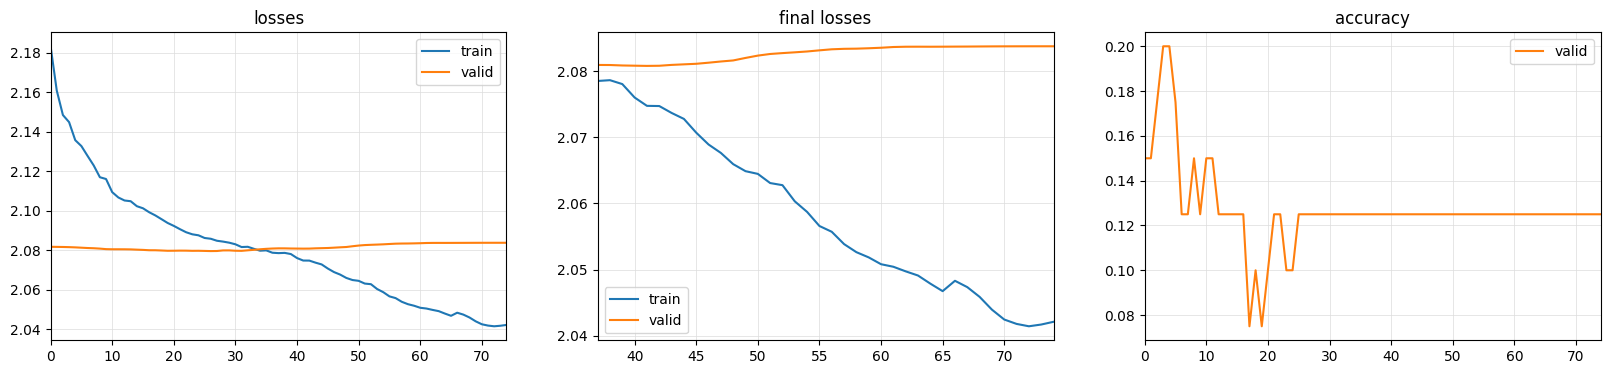

0.125
2023-12-14_005 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.178810,2.085650,0.125000,00:00
1,2.148334,2.085659,0.125000,00:00
2,2.132249,2.085620,0.125000,00:00
3,2.127484,2.085559,0.125000,00:00
4,2.127967,2.085448,0.125000,00:00
5,2.122686,2.085281,0.125000,00:00
6,2.115855,2.085092,0.125000,00:00
7,2.114011,2.084855,0.125000,00:00
8,2.108363,2.084500,0.125000,00:00
9,2.104966,2.084129,0.125000,00:00


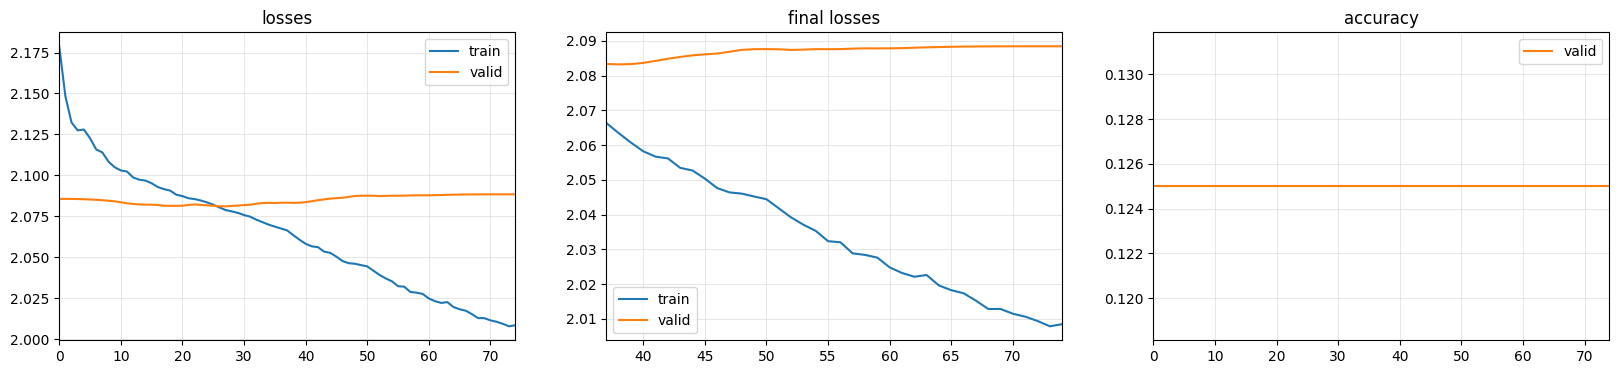

0.125
2023-12-14_007 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.119399,2.089962,0.125000,00:00
1,2.106304,2.089883,0.125000,00:00
2,2.110190,2.089796,0.125000,00:00
3,2.114084,2.089630,0.125000,00:00
4,2.115869,2.089419,0.125000,00:00
5,2.113459,2.089145,0.125000,00:00
6,2.109276,2.088815,0.125000,00:00
7,2.106746,2.088412,0.125000,00:00
8,2.105228,2.087982,0.125000,00:00
9,2.104279,2.087584,0.125000,00:00


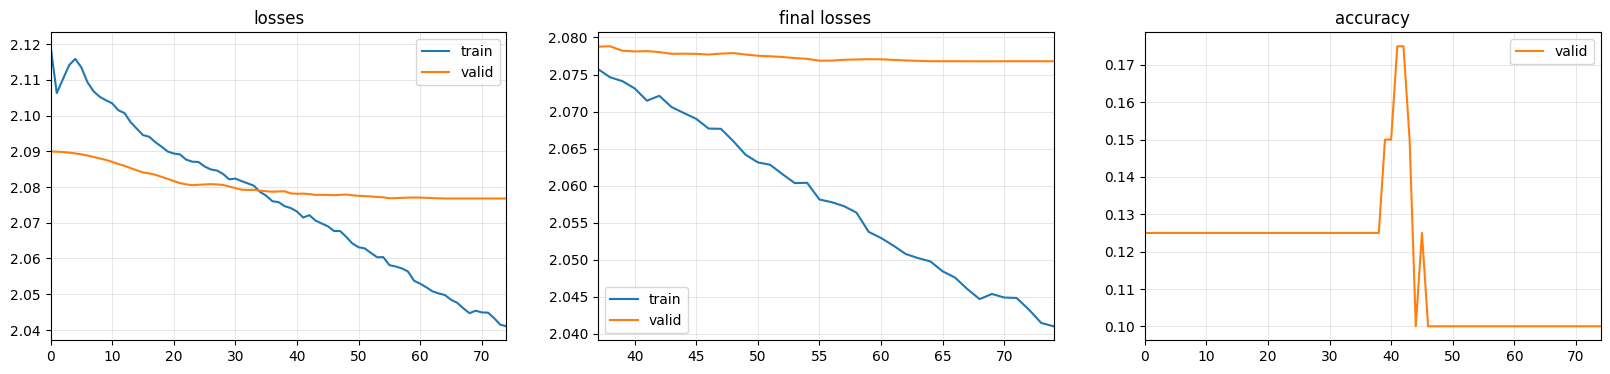

0.10000000149011612
2023-12-17_008 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.148128,2.084622,0.125000,00:00
1,2.133654,2.084536,0.125000,00:00
2,2.132831,2.084409,0.125000,00:00
3,2.123115,2.084281,0.125000,00:00
4,2.117175,2.084124,0.125000,00:00
5,2.110529,2.083945,0.125000,00:00
6,2.108826,2.083736,0.125000,00:00
7,2.108607,2.083552,0.125000,00:00
8,2.108644,2.083307,0.125000,00:00
9,2.104968,2.083053,0.125000,00:00


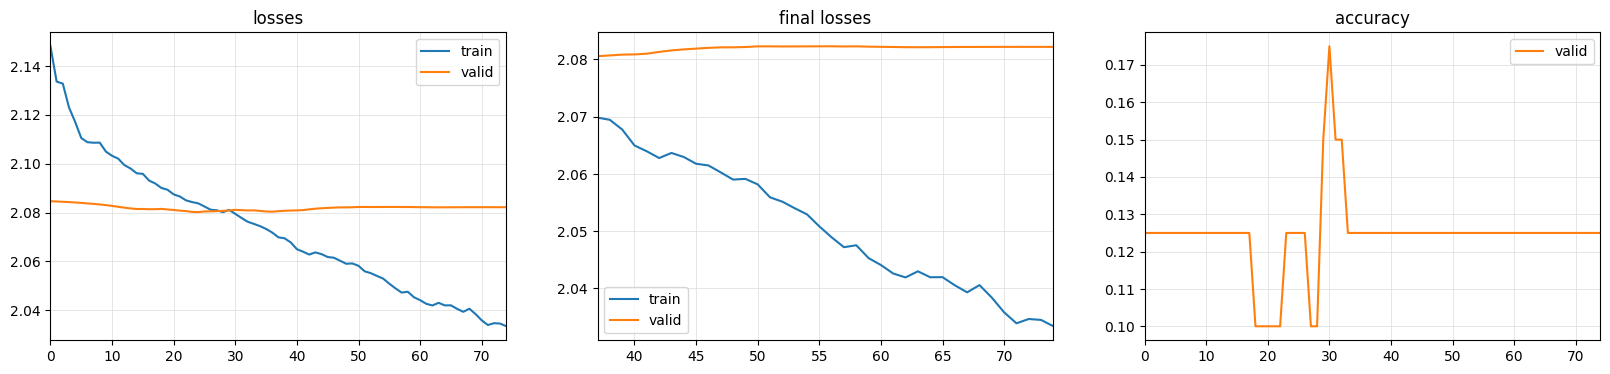

0.125
2023-12-17_004 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.192076,2.088079,0.125000,00:00
1,2.178833,2.088029,0.125000,00:00
2,2.166888,2.087959,0.125000,00:00
3,2.159154,2.087880,0.125000,00:00
4,2.158827,2.087795,0.125000,00:00
5,2.151440,2.087699,0.125000,00:00
6,2.145680,2.087622,0.125000,00:00
7,2.138511,2.087579,0.125000,00:00
8,2.134320,2.087476,0.125000,00:00
9,2.128486,2.087158,0.125000,00:00


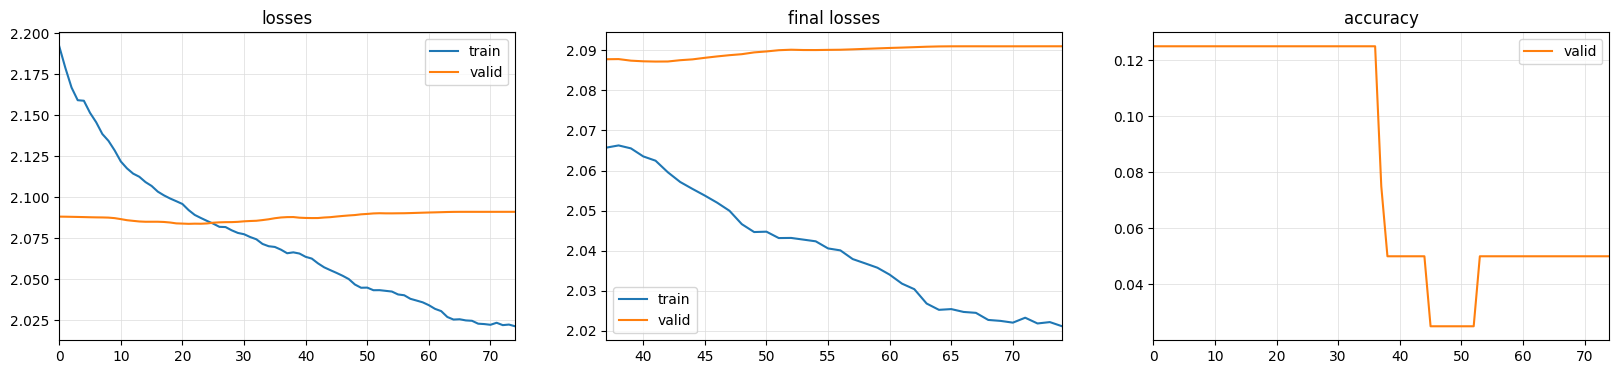

0.05000000074505806
2023-12-14_006 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.158608,2.082818,0.125000,00:00
1,2.144053,2.082739,0.125000,00:00
2,2.139745,2.082613,0.125000,00:00
3,2.139827,2.082438,0.125000,00:00
4,2.127303,2.082236,0.125000,00:00
5,2.125719,2.082052,0.125000,00:00
6,2.124593,2.081803,0.125000,00:00
7,2.118272,2.081515,0.125000,00:00
8,2.114385,2.081245,0.125000,00:00
9,2.110807,2.081042,0.125000,00:00


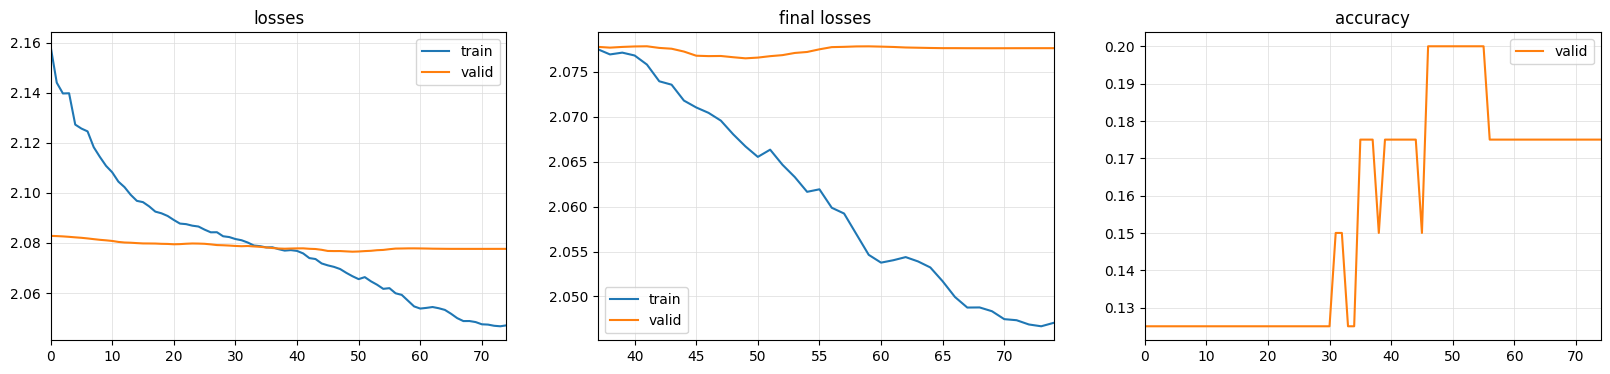

0.17499999701976776
2023-12-14_004 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.169623,2.084265,0.125000,00:00
1,2.178167,2.084244,0.125000,00:00
2,2.173245,2.084216,0.125000,00:00
3,2.165298,2.084171,0.125000,00:00
4,2.153843,2.084086,0.125000,00:00
5,2.140534,2.083935,0.125000,00:00
6,2.132822,2.083787,0.125000,00:00
7,2.128551,2.083673,0.125000,00:00
8,2.124452,2.083468,0.125000,00:00
9,2.121117,2.083235,0.125000,00:00


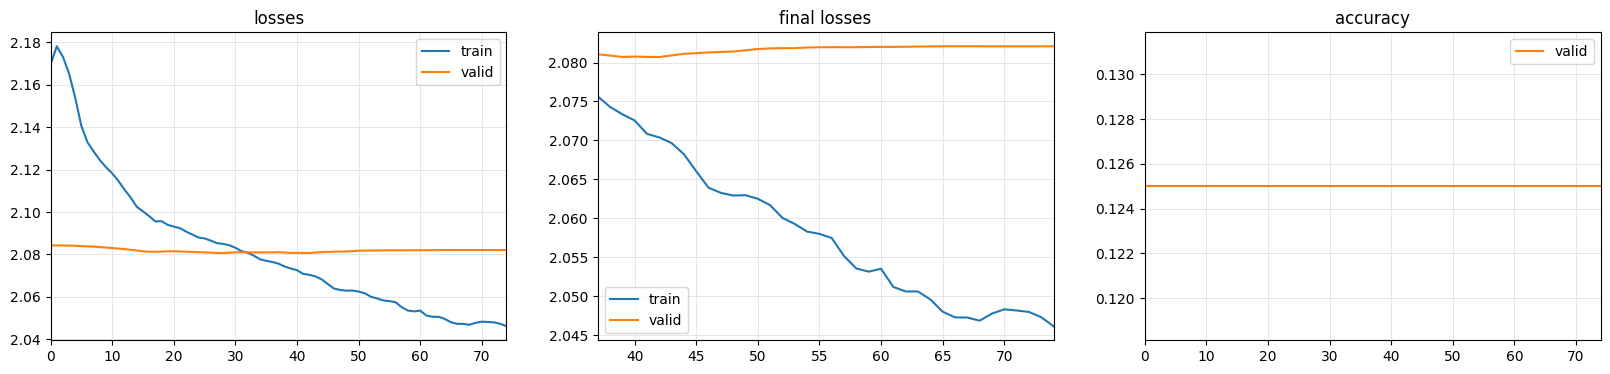

0.125
2023-12-14_009 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.114618,2.087006,0.125000,00:00
1,2.124033,2.086962,0.125000,00:00
2,2.126601,2.086908,0.125000,00:00
3,2.122683,2.086793,0.125000,00:00
4,2.116686,2.086625,0.125000,00:00
5,2.111779,2.086334,0.125000,00:00
6,2.109447,2.085972,0.125000,00:00
7,2.110166,2.085638,0.125000,00:00
8,2.106755,2.085311,0.125000,00:00
9,2.104493,2.085060,0.125000,00:00


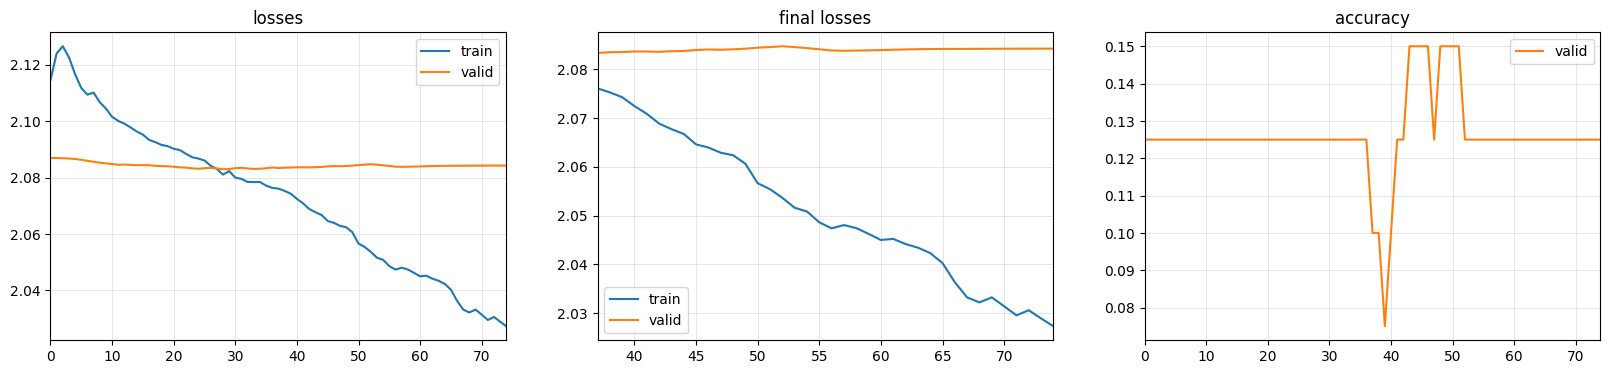

0.125
2023-12-17_006 (360, 100, 68)


epoch,train_loss,valid_loss,accuracy,time
0,2.128916,2.083854,0.125000,00:00
1,2.141072,2.083929,0.125000,00:00
2,2.148735,2.084027,0.125000,00:00
3,2.140433,2.084110,0.125000,00:00
4,2.143828,2.084211,0.125000,00:00
5,2.144673,2.084298,0.125000,00:00
6,2.139196,2.084339,0.125000,00:00
7,2.132379,2.084193,0.125000,00:00
8,2.124814,2.083992,0.125000,00:00
9,2.120583,2.083664,0.125000,00:00


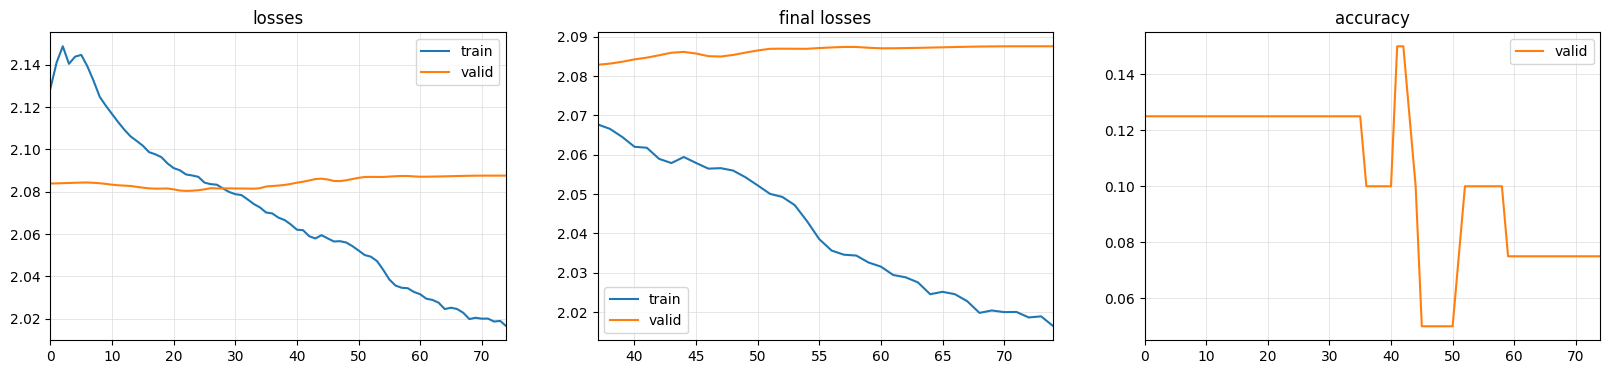

0.07500000298023224
0.11388888913724157


In [5]:
from torch import nn

model_dict = {}

results = []

#tfms  = [[Categorize()], [Categorize()]]

output_dim = 8 # Default is 8.

if(to_bin):
    output_dim = 2
elif(to_fourway):
    output_dim = 4

for key, val in data_dict.items():
    c_in = val.shape[1]

    labels = []

    for key2, val2 in data_dict.items():
        if key2 != key:
            val = np.concatenate((val, val2), axis=0)
            labels = np.concatenate((labels, label_dict[key2]), axis=0)

    train_set = TSDataset(np.array(val), np.ceil(labels).astype(int), types=(TSTensor, TSLabelTensor))
    val_set = TSDataset(np.array(data_dict[key]), np.array(label_dict[key]).astype(int), types=(TSTensor, TSLabelTensor))

    dls = TSDataLoaders.from_dsets(train_set, val_set, batch_tfms=[TSStandardize()], num_workers=0, device=torch.device('cpu'), shuffle_train=False) #tfms=tfms

    print(key, val.shape)
    #model = LSTM(c_in=100, c_out=output_dim, hidden_size=100, n_layers=2, bias=True, rnn_dropout=0.9, bidirectional=False, fc_dropout=0.9)
    model = build_ts_model(arch=TCN, dls=dls, c_in=c_in, c_out=output_dim, seq_len=68, device=torch.device('cpu'), arch_config={'fc_dropout':0.9, 'conv_dropout':0.9})
    model_dict[key] = model

    learn = Learner(dls, model, metrics=accuracy, loss_func=CrossEntropyLossFlat())

    learn.fit_one_cycle(75, 1e-3)

    learn.recorder.plot_metrics()

    #learn.plot_confusion_matrix()

    temp_res = learn.recorder.values[-1][-1]

    print(temp_res)
    results.append(temp_res)

print(np.average(results))